In [3]:
import pandas as pd
import matplotlib as mpl
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 

mpl.rcParams['axes.unicode_minus'] = False

total_list = pd.read_csv('total_list2.csv')
boxoffice = pd.read_csv('boxoffice2.csv') 
genre_total = pd.read_csv('genre_total2.csv',  thousands = ',')   #천단위 숫자기호 제거

In [16]:
import matplotlib.font_manager as fm

#1. 폰트 리스트 확인
font_list = fm.findSystemFonts(fontpaths = None, fontext = 'ttf')
font_list[:]

#2. 리스트 중, 기존 글꼴 가져오기

import matplotlib
fm.findSystemFonts(fontpaths=None, fontext='ttf')
plt.rc('font', family='gulim')

# # 혹은 폰트 경로를 직접 전달해줘도 동작합니다.
# # 다만 사용가능한 폰트 목록과 확장자명 확인이 필요합니다.
font_location = 'C:\\Windows\\Fonts\\gulim.ttc' # for windows

font_nm = fm.FontProperties(fname=font_location).get_name() # 폰트명 가져와서 변수에 저장
matplotlib.rc('font', family=font_nm)

# 마이너스 글꼴 깨짐 해결
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False

['C:\\Windows\\Fonts\\trebucbd.ttf',
 'C:\\Windows\\Fonts\\BELL.TTF',
 'C:\\Windows\\Fonts\\NIAGSOL.TTF',
 'C:\\WINDOWS\\Fonts\\trebuc.ttf',
 'C:\\Windows\\Fonts\\REFSPCL.TTF',
 'C:\\Windows\\Fonts\\H2GPRM.TTF',
 'C:\\Windows\\Fonts\\PALSCRI.TTF',
 'C:\\Windows\\Fonts\\trebucbi.ttf',
 'C:\\WINDOWS\\Fonts\\seguisli.ttf',
 'C:\\Windows\\Fonts\\CASTELAR.TTF',
 'C:\\Windows\\Fonts\\wingding.ttf',
 'C:\\Windows\\Fonts\\COLONNA.TTF',
 'C:\\Windows\\Fonts\\BRLNSB.TTF',
 'C:\\WINDOWS\\Fonts\\BRADHITC.TTF',
 'C:\\WINDOWS\\Fonts\\FRAHVIT.TTF',
 'C:\\Windows\\Fonts\\corbelli.ttf',
 'C:\\Windows\\Fonts\\SegoeIcons.ttf',
 'C:\\Windows\\Fonts\\CENTAUR.TTF',
 'C:\\Windows\\Fonts\\malgunsl.ttf',
 'C:\\Windows\\Fonts\\LeelaUIb.ttf',
 'C:\\Windows\\Fonts\\Candarai.ttf',
 'C:\\Windows\\Fonts\\OUTLOOK.TTF',
 'C:\\WINDOWS\\Fonts\\timesi.ttf',
 'C:\\WINDOWS\\Fonts\\OUTLOOK.TTF',
 'C:\\Windows\\Fonts\\PERTIBD.TTF',
 'C:\\Windows\\Fonts\\seguiemj.ttf',
 'C:\\Windows\\Fonts\\TCCEB.TTF',
 'C:\\Windows\\Fonts\\G

In [50]:
genre_total.drop('Unnamed: 0', axis=1, inplace = True)

In [51]:
# 연, 월 object로 변환 
genre_total['month'] = genre_total['month'].astype(object)
genre_total['year'] = genre_total['year'].astype(object)
genre_total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 966 entries, 0 to 965
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   month         966 non-null    object 
 1   genre         966 non-null    object 
 2   number_movie  966 non-null    int64  
 3   t_use         966 non-null    int64  
 4   share         966 non-null    float64
 5   year          966 non-null    object 
dtypes: float64(1), int64(2), object(3)
memory usage: 45.4+ KB


In [79]:
genre_total[genre_total['year'] == 2022]

,month,genre,number_movie,t_use,share,year
483,1,액션,2739,736423,29.1,2022
484,1,애니메이션,1229,466282,18.4,2022
485,1,범죄,551,386315,15.3,2022
486,1,드라마,4750,261060,10.3,2022
487,1,멜로/로맨스,3674,140234,5.6,2022
...,...,...,...,...,...,...
541,3,가족,109,10531,0.6,2022
542,3,사극,103,9369,0.5,2022
543,3,서부극(웨스턴),33,2576,0.1,2022
544,3,뮤지컬,43,1737,0.1,2022


In [53]:
# 2018년도

yearly_2018 = genre_total[genre_total['year']==2018]    # 전체 데이터에서 2018년도
yearly_2018_group = yearly_2018.groupby(['genre']).sum()   # 장르별 합계 
yearly_2018 = yearly_2018_group.sort_values(by ='t_use',ascending=False )  # 총 이용건수 내림차순 정렬 
yearly_2018_top5 = yearly_2018.head(5)   #top5 만 보기
yearly_2018_top5   ## 장르별, 총 이용건수의 상위 5개 
yearly_2018_top5  = yearly_2018_top5.reset_index()
yearly_2018_top5

,genre,number_movie,t_use,share
0,액션,17849,15676804,205.7
1,드라마,32042,8920380,127.9
2,애니메이션,8813,7389688,95.1
3,범죄,3954,5811285,73.8
4,멜로/로맨스,19365,3901655,53.9


In [68]:
#2019년도
yearly_2019_top5 = genre_total[genre_total['year'] ==2019].groupby(['genre']).sum().sort_values(by = 't_use',ascending=False).head(5).reset_index()
yearly_2019_top5

,genre,number_movie,t_use,share
0,액션,26957,15878399,272.8
1,드라마,45873,12680959,214.5
2,애니메이션,12755,8680535,144.0
3,범죄,5865,7598793,132.9
4,코미디,16390,7121046,121.1


In [80]:
#2020년도
yearly_2020_top5 = genre_total[genre_total['year'] ==2020].groupby(['genre']).sum().sort_values(by = 't_use',ascending=False).head(5).reset_index()
yearly_2020_top5
#2021년도
yearly_2021_top5 = genre_total[genre_total['year'] ==2021].groupby(['genre']).sum().sort_values(by = 't_use',ascending=False).head(5).reset_index()
yearly_2021_top5

#2022년도
yearly_2022_top5 = genre_total[genre_total['year'] ==2022].groupby(['genre']).sum().sort_values(by = 't_use',ascending=False).head(5).reset_index()
yearly_2022_top5

,genre,number_movie,t_use,share
0,액션,7764,1818286,81.0
1,애니메이션,3564,1179820,51.8
2,범죄,1521,1172873,51.9
3,드라마,13256,802636,36.5
4,멜로/로맨스,10460,456763,21.3


# 파이차트 그릴때 주의점! 
## 파이차트의 값을 리스트로 변환해서 넣어야함!


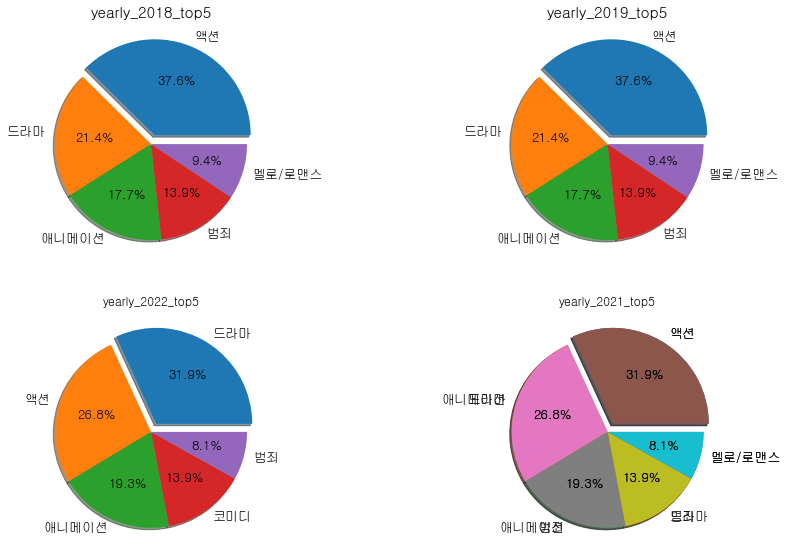

In [84]:
fig = plt.figure(figsize = (15,15)) 

######################
number = yearly_2018_top5['t_use']
labels = yearly_2018_top5['genre']

ax1 = plt.subplot(3,2,1)  # 행, 열, 위치

ax1.pie(number,   # 파이 값
        labels = labels,   # 레이블 명 리스트로 주기 
        autopct='%.1f%%',   # 안에 값 퍼센트로 표시
        explode=[0.1, 0, 0, 0, 0],    # 조각 떼어내기(%)
       shadow=True,    # 그림자 설정
        textprops={'size': 13}  )   # 폰트 사이즈

ax1.set_title('yearly_2018_top5', size =15)

######################
ax2 = plt.subplot(3,2,2)  # 행, 열, 위치

number2 = yearly_2019_top5['t_use']
labels2 = yearly_2019_top5['genre']

ax2.pie(number,   # 파이 값
        labels = labels,   # 레이블 명 리스트로 주기 
        autopct='%.1f%%',   # 안에 값 퍼센트로 표시
        explode=[0.1, 0, 0, 0, 0],    # 조각 떼어내기(%)
       shadow=True,    # 그림자 설정
        textprops={'size': 13}  )   # 폰트 사이즈

ax2.set_title('yearly_2019_top5', size = 15)
# ax2.figure(figsize = (12,12))


##############
number3 = yearly_2020_top5['t_use']
labels3 = yearly_2020_top5['genre']

ax3 = plt.subplot(3,2,3)

ax3.pie( number3, 
        labels = labels3,
        autopct='%.1f%%',   # 안에 값 퍼센트로 표시
        explode=[0.1, 0, 0, 0, 0],    # 조각 떼어내기(%)
       shadow=True,    # 그림자 설정
        textprops={'size': 13}  )   # 폰트 사이즈
              

ax3.set_title('yearly_2020_top5')




########
number4 = yearly_2021_top5['t_use']
labels4 = yearly_2021_top5['genre']


ax4 = plt.subplot(3,2,4)

ax4.pie( number3, 
        labels = labels4,
        autopct='%.1f%%',   # 안에 값 퍼센트로 표시
        explode=[0.1, 0, 0, 0, 0],    # 조각 떼어내기(%)
       shadow=True,    # 그림자 설정
        textprops={'size': 13}  )   # 폰트 사이즈


ax4.set_title('yearly_2021_top5')



############
number5 = yearly_2022_top5['t_use']
labels5 = yearly_2022_top5['genre']


ax5 = plt.subplot(3,2,4)

ax5.pie( number3, 
        labels = labels5,
        autopct='%.1f%%',   # 안에 값 퍼센트로 표시
        explode=[0.1, 0, 0, 0, 0],    # 조각 떼어내기(%)
       shadow=True,    # 그림자 설정
        textprops={'size': 13}  )   # 폰트 사이즈
              
ax3.set_title('yearly_2022_top5')






plt.show()

